# Análisis de Datos Spotify 2023: *Most Streamed Spotify Songs 2023* 🎵📊


## Integrantes

* Lizbeth Viridiana Alejandro Alpizar
* María Isabel Rocha Vargas
* Montserrat De la Cueva Meza
* Yohanna
* Laura

## Descripción
Los cambios en las tendencias musicales ocurren a un ritmo acelerado, lo que plantea desafíos interesantes para comprender y predecir el comportamiento de los consumidores en el mundo de la música. Este proyecto se centra en analizar los datos de Spotify para identificar tendencias temporales y responder a diversas preguntas relacionadas con la evolución de la música a lo largo del tiempo.🚀

## Objetivos
nota: los objetivos se desarollan a lo largo del proyecto
- Obtener el lapso de tiempo en el que cambian las tendencias
- Hacer un modelo predictivo que recomiendo musíca en basea  las tendicas del 2023. T3
- Saber si el artista determina el nuevo genero en tendenicia o diseversa.
- Experimentar con los diversos modelos de Machine Learning.
- Comprobar si algunas variables de tendencia tienen un patrón en común.



## Metodos utilizados para alcanzar los objetivos

## Información por columna
* track_name: Name of the song
* artist(s)_name: Name of the artist(s) of the song
* artist_count: Number of artists contributing to the song
* released_year: Year when the song was released
* released_month: Month when the song was released
* released_day: Day of the month when the song was released
* in_spotify_playlists: Number of Spotify playlists the song is included in
* in_spotify_charts: Presence and rank of the song on Spotify charts
* streams: Total number of streams on Spotify
* in_apple_playlists: Number of Apple Music playlists the song is included in
* in_apple_charts: Presence and rank of the song on Apple Music charts
* in_deezer_playlists: Number of Deezer playlists the song is included in
* in_deezer_charts: Presence and rank of the song on Deezer charts
* in_shazam_charts: Presence and rank of the song on Shazam charts
* bpm: Beats per minute, a measure of song tempo
* key: Key of the song
* mode: Mode of the song (major or minor)
* danceability_%: Percentage indicating how suitable the song is for dancing
* valence_%: Positivity of the song's musical content
* energy_%: Perceived energy level of the song
* acousticness_%: Amount of acoustic sound in the song
* instrumentalness_%: Amount of instrumental content in the song
* liveness_%: Presence of live performance elements
* speechiness_%: Amount of spoken words in the song



## Limpieza y exploración de los datos

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import requests
import chardet
import nltk
from nltk.corpus import stopwords

In [ ]:
!pip install chardet

In [ ]:
url = 'https://raw.githubusercontent.com/Isa-Rocha31415/An-lisis-de-datos-Spotify-2023/main/spotify-2023.csv'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
df_spot = pd.read_csv(url, encoding=encoding)
df_spot.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## TEMA 1: Definición de un proyecto con Machine Learning


## Conceptos Básicos de Machine Learning aplicados a datos de Spotify:
### Machine Learning:
El Machine Learning es una tecnología que permite a las computadoras aprender patrones a partir de datos y utilizar esos patrones para hacer predicciones o tomar decisiones automáticamente. Por ejemplo, en el caso de Spotify, Machine Learning ayuda a entender qué tipo de música le gusta a una persona y le recomienda canciones similares.
### Datos:
El pilar fundamental del Machine Learning son los datos. Estos pueden ser de diferentes tipos, como texto, imágenes, audio, o en el caso de Spotify, datos sobre canciones y sus características.
Los datos en Spotify incluyen características de las canciones y métricas de popularidad.

- Características de las canciones: proporcionan información sobre el contenido y el estilo de la música.


    1. Nombre del artista (artist_name)
    2. Año de lanzamiento (released_year)
    3. Tempo de la canción (bpm)
    4. Positividad musical (valence_%),
    5. Nivel de energía (energy_%)

-Métricas de popularidad: indican la popularidad y la relevancia de una canción

    1. Número de reproducciones (streams)
    2. Presencia en listas de reproducción (in_spotify_playlists, in_apple_playlists, in_deezer_playlists)
    3. Clasificación en listas de éxitos (in_spotify_charts, in_apple_charts, in_deezer_charts, in_shazam_charts)


### Algoritmos:
Son fórmulas y métodos matemáticos utilizados para aprender de los datos y realizar predicciones o tomar decisiones. Los algoritmos de Machine Learning se clasifican en algoritmos supervisados, no supervisados y de aprendizaje por refuerzo.

En Spotify, se utilizan algoritmos de Machine Learning para analizar los datos y hacer predicciones sobre las preferencias de los usuarios. Por ejemplo, el algoritmo de regresión puede predecir la popularidad de una canción basándose en sus características musicales y métricas de popularidad. Los algoritmos de clasificación pueden etiquetar las canciones en géneros musicales basándose en sus características. Los algoritmos de filtrado colaborativo pueden hacer recomendaciones personalizadas basándose en el historial de escucha de un usuario y en la similitud entre canciones y usuarios.

### Modelo:
Es la representación matemática aprendida a partir de los datos. El modelo captura los patrones y relaciones entre las variables del conjunto de datos y se utiliza para hacer predicciones sobre nuevos datos.

Un modelo de Machine Learning aplicado en Spotify captura las relaciones entre las características de las canciones, las métricas de popularidad y las preferencias de los usuarios. Por ejemplo, un modelo de recomendación puede aprender de los datos históricos de reproducción de los usuarios para hacer predicciones sobre qué canciones podrían gustarles en el futuro. Este modelo se entrena utilizando datos de entrenamiento y se evalúa utilizando métricas de rendimiento para asegurar que pueda hacer predicciones precisas en nuevos datos.

### Entrenamiento y Evaluación:
Para enseñar a una computadora a hacer predicciones precisas, primero le mostramos muchos ejemplos de datos y les decimos qué debería aprender de ellos. Luego, comprobamos qué tan bien lo hizo la computadora comparando sus predicciones con la realidad. Por ejemplo, Spotify podría mostrarle a la computadora datos sobre qué canciones le gustaron a una persona en el pasado y luego comprobar si las nuevas canciones recomendadas también le gustan.


## TEMA 2: Uso de algoritmos de ML para separar, validar y evaluar


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
df_spot.isna().sum(axis=0)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
df_numeric = df_spot.select_dtypes(include=['float64', 'int64'])

In [ ]:
corr_matrix = df_numeric.corr()

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

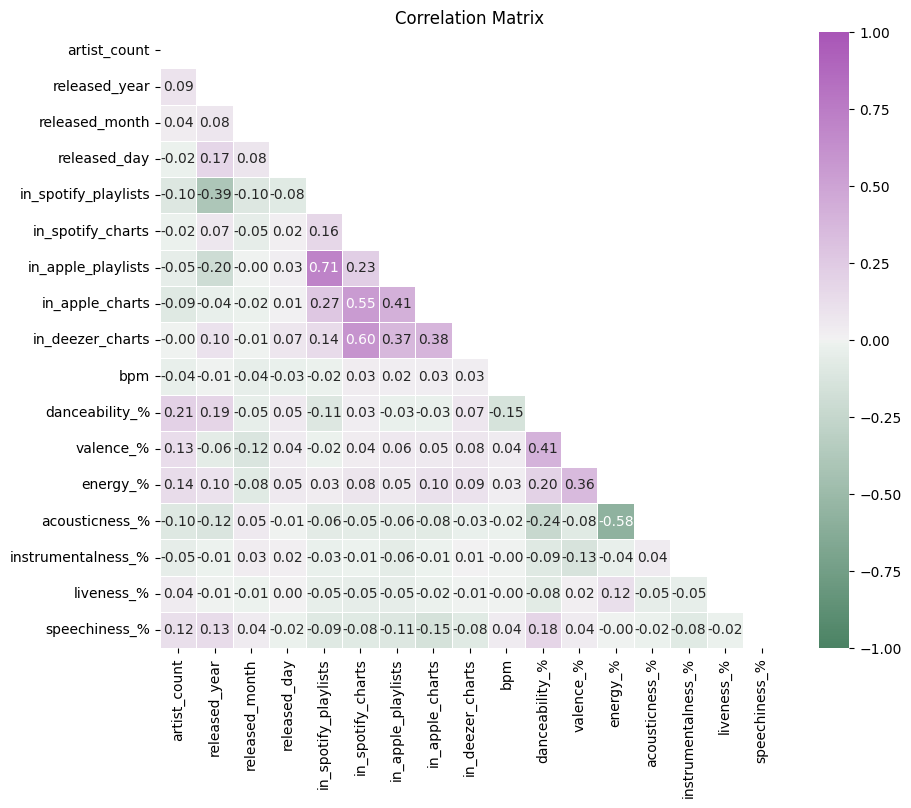

In [ ]:
# Hacemos un analisis de la correlacion de los datos para elegir un par de datos para un futuro modelo ML
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True), fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

* Dividimos el dataset en las siguientes particiones:
  * De entrenamiento: servira para que el algoritmo se ajuste, entrene y aprenda
  * De validación: sirve para evaluar el algoritmo y decidir qye tal va a prendiendo
  * De prueba: cuando el algoritmo termino de entrenar, se observará que tan preciso es el algoritmo

In [ ]:
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    #test_size -> tamaño de la partición de pruebas
    temp_size = porcentaje_validacion + porcentaje_prueba
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

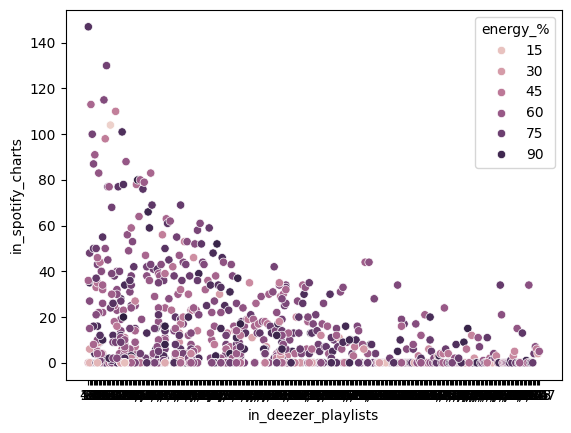

In [ ]:
# datos de entrada: in_deezer_charts, in_spotify_charts
# datos de salida: energy_%
sns.scatterplot(data=df_spot, x='in_deezer_playlists',y='in_spotify_charts', hue='energy_%')
plt.show()

In [ ]:
#Al contar con pocos datos, la partición queda de la siguiente manera:
#80% entrenamiento, 5% validacion, 15% prueba
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(df_spot[['in_deezer_charts', 'in_spotify_charts']], df_spot['energy_%'], 0.80, 0.05, 0.15)

print('Total del filas del dataset: ', df_spot.shape[0])
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

Total del filas del dataset:  953
(762, 2)
(47, 2)
(144, 2)


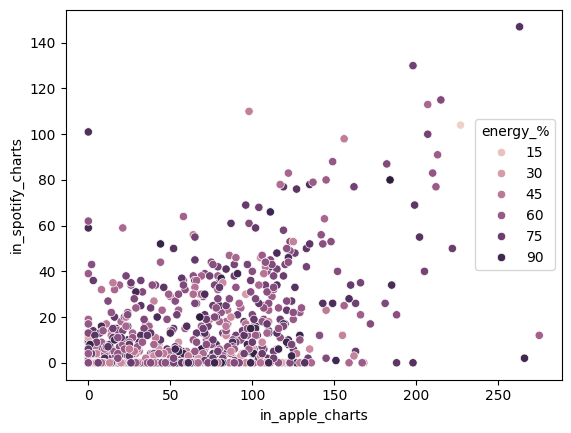

In [ ]:
# datos de entrada: danceability_% , valence_%
# datos de salida: valence_%
sns.scatterplot(data=df_spot, x='in_apple_charts',y='in_spotify_charts', hue='energy_%')
plt.show()

In [ ]:
#Particionando en 60% entrenamiento, 10% validacion, 30% prueba
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(df_spot[['in_apple_charts', 'in_spotify_charts']], df_spot['energy_%'],0.60,0.10,0.30)

print('Total del filas del dataset: ', df_spot.shape[0])
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

Total del filas del dataset:  953
(571, 2)
(95, 2)
(287, 2)


In [ ]:
#Al contar con pocos datos, la partición queda de la siguiente manera:
#80% entrenamiento, 5% validacion, 15% prueba
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(df_spot[['in_apple_charts', 'in_spotify_charts']], df_spot['energy_%'], 0.80, 0.05, 0.15)

print('Total del filas del dataset: ', df_spot.shape[0])
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

Total del filas del dataset:  953
(762, 2)
(47, 2)
(144, 2)


In [ ]:
X = df_spot[['in_apple_charts', 'in_spotify_charts']].iloc
Y = df_spot['energy_%'].iloc

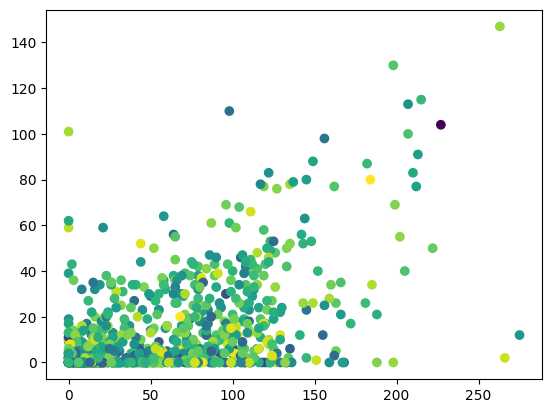

In [ ]:
plt.scatter(X[:,0], X[:,1], c=df_spot['energy_%'])
plt.show()

## K-Fold

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Definir las características (X) y las etiquetas (y) del Dataset:
# Las características (X) son todas las columnas excepto 'energy_%, que representa la variable a predecir.
X = df_spot.drop(columns=['energy_%'])
y = df_spot['energy_%']

# Definir el número de particiones K para la validación cruzada.
K = 3

# Configurar el valor de la semilla aleatoria para garantizar reproducibilidad.
random_seed = 48

# Establecer si queremos aleatorizar el orden de los datos antes de dividirlos en pliegues.
aleatorio = True

# Creamos una instancia de la clase KFold para dividir los datos en K partes.
kfold = KFold(n_splits=K, shuffle=aleatorio, random_state=random_seed)

# Inicializamos el contador del ciclo.
ciclo = 1

# Iteramos a través de las divisiones generadas por kfold para entrenamiento y prueba.
for indices_train, indices_test in kfold.split(X):
    # Imprimimos el número de ciclo actual para mantener un seguimiento del progreso del bucle.
    print("Ciclo: " + str(ciclo))

    # Seleccionamos los datos de entrenamiento y prueba utilizando los índices generados.
    X_train, X_test = X.iloc[indices_train], X.iloc[indices_test]  # Características de entrenamiento y prueba.
    y_train, y_test = y.iloc[indices_train], y.iloc[indices_test]  # Etiquetas de entrenamiento y prueba.

    # Proporciona información sobre la cantidad de datos utilizados en cada etapa del proceso de entrenamiento y evaluación del modelo.
    print("Usar " + str(X_train.shape[0]) + " datos para entrenar (entrada)")
    print("Usar " + str(y_train.shape[0]) + " datos para entrenar (salida)")

    print("Usar " + str(X_test.shape[0]) + " datos para probar (entrada)")
    print("Usar " + str(y_test.shape[0]) + " datos para probar (salida)")

    # Incrementamos el número de ciclo para el siguiente ciclo.
    ciclo += 1

Ciclo: 1
Usar 635 datos para entrenar (entrada)
Usar 635 datos para entrenar (salida)
Usar 318 datos para probar (entrada)
Usar 318 datos para probar (salida)
Ciclo: 2
Usar 635 datos para entrenar (entrada)
Usar 635 datos para entrenar (salida)
Usar 318 datos para probar (entrada)
Usar 318 datos para probar (salida)
Ciclo: 3
Usar 636 datos para entrenar (entrada)
Usar 636 datos para entrenar (salida)
Usar 317 datos para probar (entrada)
Usar 317 datos para probar (salida)


## TEMA 3: Algoritmos no supervisados (k.means) y Algoritmos supervisados (Regresión Lineal y Árboles de Decisión)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import requests
import chardet
import nltk
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


###Algoritmos no supervisados (k.means)

In [ ]:
#Elegir solo valores numericos del
predictor = ['bpm', 'danceability_%', 'valence_%', 'energy_%',
                           'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


In [ ]:
#Normalizar el df(tener valor de 0 a 1)
scaler = MinMaxScaler()
predictor_norma = scaler.fit_transform(df_spot[predictor])


df_norma = pd.DataFrame(predictor_norma, columns = predictor)
df_norma.head()

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.425532,0.780822,0.913978,0.840909,0.319588,0.000000,0.053191,0.032258
1,0.191489,0.657534,0.612903,0.738636,0.072165,0.000000,0.074468,0.032258
2,0.517730,0.383562,0.301075,0.500000,0.175258,0.000000,0.297872,0.064516
3,0.744681,0.438356,0.580645,0.715909,0.113402,0.000000,0.085106,0.209677
4,0.560284,0.575342,0.204301,0.806818,0.144330,0.692308,0.085106,0.064516


####Búsqueda de la cantidad optima de clusters

In [ ]:
import warnings
warnings.filterwarnings("ignore")

inertia_values=[]
rango_clu=range(1, 15)

for k in rango_clu:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_norma)
  inertia_values.append(kmeans.inertia_)


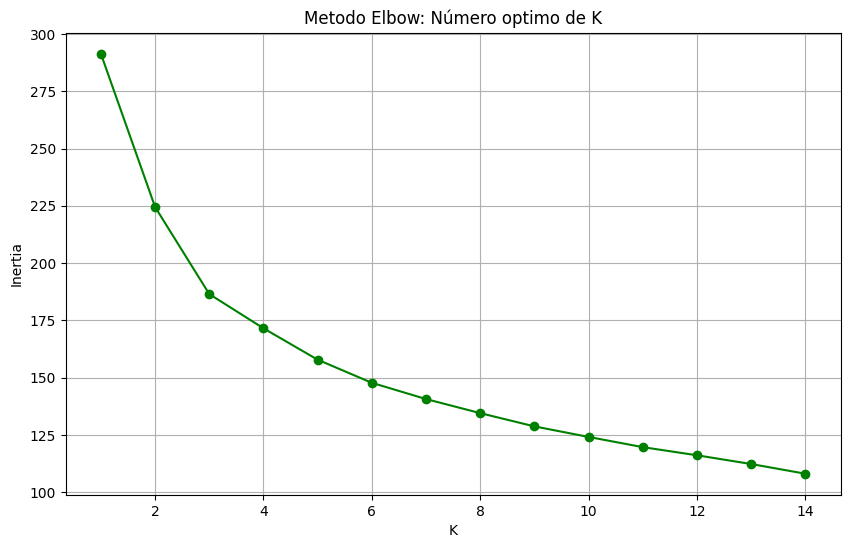

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(rango_clu, inertia_values,marker='o',color='green')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Metodo Elbow: Número optimo de K')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

#con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_norma)

#Comprobar si es optimo el numero de clusters (de -1 a 1)
silhouette_avg = silhouette_score(df_norma, clusters)
silhouette_avg

0.2699215754469449

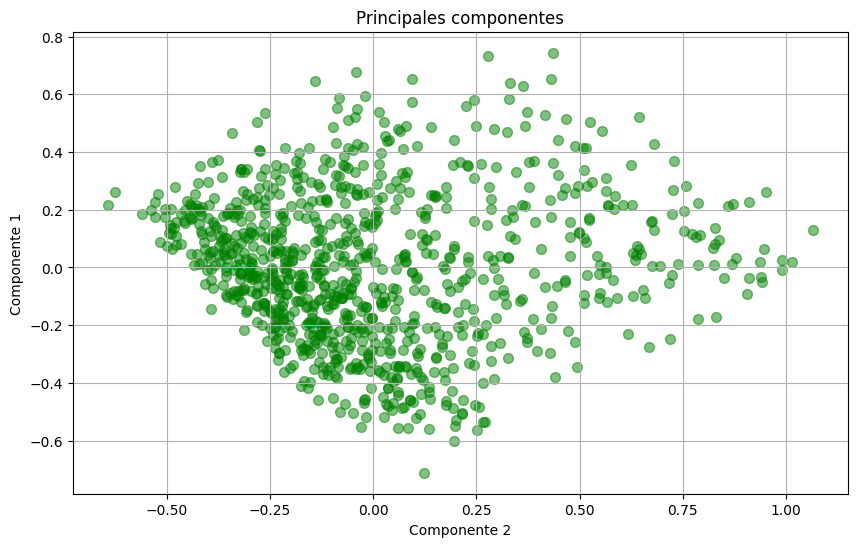

In [ ]:
from sklearn.decomposition import PCA

#PCA para 2 componentes
pca = PCA(n_components =2)
princi_componets=pca.fit_transform(df_norma)

#DF con los principales componentes
pc_df =pd.DataFrame(data=princi_componets, columns =['PC1', 'PC2'])

#plot
plt.figure(figsize=(10,6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], s=50, alpha=0.5, c='green')
plt.title('Principales componentes')
plt.ylabel('Componente 1')
plt.xlabel('Componente 2')
plt.grid(True)
plt.show()

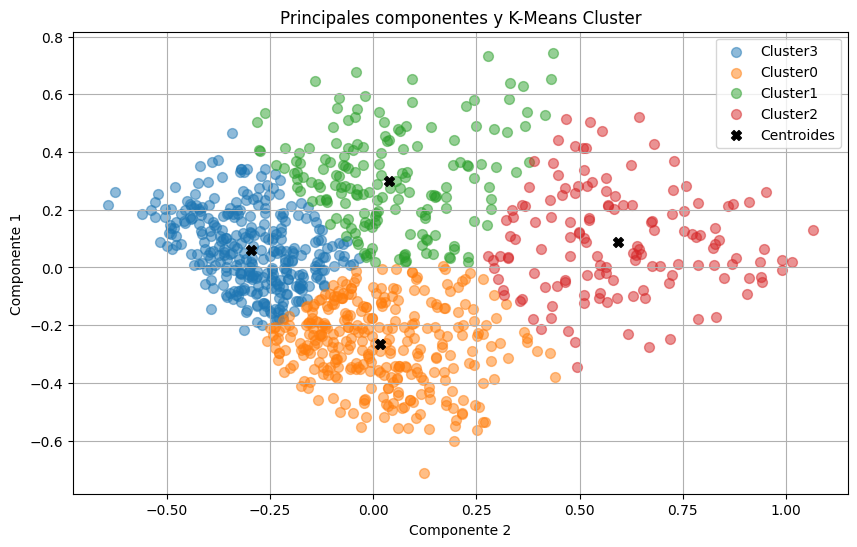

In [ ]:
from sklearn.decomposition import PCA

kmeans_pca=KMeans(n_clusters =4, random_state=42)
clusters_pca = kmeans_pca.fit_predict(princi_componets)
centroides = kmeans_pca.cluster_centers_

#Crear un Df con los principales componentes y clousters
pc_df=pd.DataFrame(data=princi_componets, columns=['PC1','PC2'])
pc_df['Cluster'] = clusters_pca

#plot combinado
plt.figure(figsize=(10,6))
for cluster in pc_df['Cluster'].unique():
  subset = pc_df[pc_df['Cluster']== cluster]
  plt.scatter(subset['PC1'], subset['PC2'], s=50, label=f'Cluster{cluster}', alpha=0.5)
plt.scatter(centroides[:, 0], centroides[:, 1], s=50, color='black', marker='X', label='Centroides')
plt.title('Principales componentes y K-Means Cluster')
plt.ylabel('Componente 1')
plt.xlabel('Componente 2')
plt.legend()
plt.grid(True)
plt.show()

####Recomiendame una cancion en base a sus carateristicas(pesos)

In [ ]:
caracteristicas = {
    'bpm': 60,
    'danceability_%': 20,
    'valence_%': 20,
    'energy_%': 20,
    'acousticness_%': 100,
    'instrumentalness_%': 100,
    'liveness_%': 15,
    'speechiness_%': 5
}

caracteristicas_df = pd.DataFrame([caracteristicas])

# Normalizamos las caracteristicas
norma_carac = scaler.transform(caracteristicas_df)

caracteristicas = kmeans.predict(norma_carac)

# Filltramos las canciones
cluster_songs = df_spot[clusters == caracteristicas[0]]

# Recomendamos 3 canciones en base a los pesos en caracteristicas
recomendacion_5 = cluster_songs.sort_values(by="streams", ascending=False).head(5)

recomendacion_5 = recomendacion_5[['track_name', 'artist(s)_name']]
recomendacion_5

,track_name,artist(s)_name
625,Arcade,Duncan Laurence
253,Glimpse of Us,Joji
455,Seek & Destroy,SZA
427,Where Are You Now,"Lost Frequencies, Calum Scott"
322,I Love You So,The Walters


In [ ]:
from sklearn.decomposition import PCA

#PCA para 2 componentes
pca = PCA(n_components =2)
princi_componets=pca.fit_transform(df_norma)

#DF con los principales componentes
pc_df =pd.DataFrame(data=princi_componets, columns =['PC1', 'PC2'])

#plot
plt.figure(figsize=(10,6))
plt.scatter(pca_df['PC1'], pc_df['PC2'], s=50, alpha=0.5, c='green')
plt.title('Principales componentes')
plt.ylabel('Componente 1')
plt.xlabel('Componente 2')
plt.grid(True)
plt.show()

NameError: name 'pca_df' is not defined

<Figure size 1000x600 with 0 Axes>

###Algoritmos supervisados (Regresión Lineal y Árboles de Decisión)

####Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
df_norma.head()

In [ ]:
X = df_norma[['bpm', 'valence_%','energy_%']]  # Parámetros de entrada
Y = df_norma['danceability_%']  # Parámetros de salida

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=8)

# Crear una instancia del modelo de regresión lineal
lin_model = LinearRegression()

# Entrenar el modelo de regresión lineal con el conjunto de entrenamiento
lin_model.fit(X_train, Y_train)

# Realizar predicciones sobre el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)

# Calcular el MSE para las predicciones del conjunto de entrenamiento
MSE_train = mean_squared_error(Y_train, y_train_predict)
print("Entrenamiento: MSE =", MSE_train)

y_test_predict = lin_model.predict(X_test)# Realizar predicciones sobre el conjunto de prueba

MSE_test = mean_squared_error(Y_test, y_test_predict)# Calcular el MSE para las predicciones del conjunto de prueba
print("Pruebas: MSE =", MSE_test)


df_predicciones = pd.DataFrame({'Y_test': Y_test, 'Predicción': y_test_predict})

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

In [ ]:
#Graficamos los resultados
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'X_test': X_test['valence_%'], 'Y_test': Y_test, 'Prediccion': y_test_predict})


# Graficar scatter plot de los datos reales y la predicción
sns.scatterplot(data=df, x='X_test', y='Y_test', label='Datos reales')
sns.scatterplot(data=df, x='X_test', y='Prediccion', label='Predicción del modelo')

# Etiquetas y título
plt.xlabel('Variable independiente')
plt.ylabel('Variable dependiente')
plt.title('Predicción del modelo vs. Datos reales')

# Mostrar la gráfica
plt.legend()
plt.show()


####Árboles de Decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.metrics import confusion_matrix

# Suponiendo que df_norma es tu DataFrame
X = df_norma[['bpm', 'valence_%', 'energy_%']]  # Parámetros de entrada
Y = df_norma['instrumentalness_%']  # Parámetros de salida

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_pruebas, Y_entrenamiento, Y_pruebas = train_test_split(X, Y, test_size=0.6, random_state=8)


# Instanciar un modelo RandomForestClassifier con 800 árboles
bosque = forest(n_estimators=800)

# Entrenar el modelo RandomForestClassifier con los datos de entrenamiento
bosque.fit(X_entrenamiento, Y_entrenamiento)

# Utilizar el modelo entrenado para predecir las etiquetas de las muestras en el conjunto de prueba
y_predichos = bosque.predict(X_pruebas)

# Generar y mostrar una matriz de confusión basada en las etiquetas reales y las predicciones
resultado = confusion_matrix(Y_pruebas, y_predichos)
print(resultado)

# Calcular los valores de TP, TN, FP, FN
(TN, FP, FN, TP) = resultado.ravel()

# Imprimir los valores de TP, TN, FP, FN
print("True positives:", TP)
print("True negatives:", TN)
print("False positives:", FP)
print("False negatives:", FN)

# Definir y calcular la precisión, sensibilidad y especificidad del modelo
def calcularAccuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN) * 100

def calcularSensibilidad(TP, TN, FP, FN):
    return TP / (TP + FN) * 100

def calcularEspecificidad(TP, TN, FP, FN):
    return TN / (TN + FP) * 100

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)

# Imprimir las métricas de rendimiento calculadas
print("Precisión:", acc, "%")
print("Sensibilidad:", sen, "%")
print("Especificidad:", spec, "%")


El código está arrojando un error específico, el `ValueError: Unknown label type: 'continuous'`, lo cual indica que el modelo utilizado no es adecuado para nuestro propósito actual. Este mensaje de error nos señala que el tipo de etiqueta (label) que estamos tratando de predecir es de tipo continuo, lo que implica que estamos intentando aplicar un algoritmo de clasificación a un problema de regresión.

Es crucial comprender las diferentes utilidades de los métodos de aprendizaje supervisado, ya que la elección entre ellos puede tener un impacto significativo en los resultados obtenidos. En este caso, al reconocer la naturaleza continua de nuestras variables objetivo, podemos optar por un modelo que se ajuste mejor a nuestras necesidades y datos.



###Algoritmos no supervisados (k.means)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Elegir solo valores numericos del
predictor = ['bpm', 'danceability_%', 'valence_%', 'energy_%',
                           'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [ ]:
#Normalizar el df(tener valor de 0 a 1)
scaler = MinMaxScaler()
predictor_norma = scaler.fit_transform(df_spot[predictor])


df_norma = pd.DataFrame(predictor_norma, columns = predictor)
df_norma.head()

####Búsqueda de la cantidad optima de clusters

In [ ]:
import warnings
warnings.filterwarnings('ignore')

inertia_values=[]
rango_clu=range(1, 15)

for k in rango_clu:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_norma)
  inertia_values.append(kmeans.inertia_)


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(rango_clu, inertia_values,marker='o',color='green')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Metodo Elbow: Número optimo de K')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

#con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_norma)

#Comprobar si es optimo el numero de clusters (de -1 a 1)
silhouette_avg = silhouette_score(df_norma, clusters)
silhouette_avg

In [ ]:
from sklearn.decomposition import PCA

#PCA para 2 componentes
pca = PCA(n_components =2)
princi_componets=pca.fit_transform(df_norma)

#DF con los principales componentes
pc_df =pd.DataFrame(data=princi_componets, columns =['PC1', 'PC2'])

#plot
plt.figure(figsize=(10,6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], s=50, alpha=0.5, c='green')
plt.title('Principales componentes')
plt.ylabel('Componente 1')
plt.xlabel('Componente 2')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

kmeans_pca=KMeans(n_clusters =4, random_state=42)
clusters_pca = kmeans_pca.fit_predict(princi_componets)
centroides = kmeans_pca.cluster_centers_

#Crear un Df con los principales componentes y clousters
pc_df=pd.DataFrame(data=princi_componets, columns=['PC1','PC2'])
pc_df['Cluster'] = clusters_pca

#plot combinado
plt.figure(figsize=(10,6))
for cluster in pc_df['Cluster'].unique():
  subset = pc_df[pc_df['Cluster']== cluster]
  plt.scatter(subset['PC1'], subset['PC2'], s=50, label=f'Cluster{cluster}', alpha=0.5)
plt.scatter(centroides[:, 0], centroides[:, 1], s=50, color='black', marker='X', label='Centroides')
plt.title('Principales componentes y K-Means Cluster')
plt.ylabel('Componente 1')
plt.xlabel('Componente 2')
plt.legend()
plt.grid(True)
plt.show()

####Recomiendame una cancion en base a sus carateristicas(pesos)

In [ ]:
caracteristicas = {
    'bpm': 60,
    'danceability_%': 20,
    'valence_%': 20,
    'energy_%': 20,
    'acousticness_%': 100,
    'instrumentalness_%': 100,
    'liveness_%': 15,
    'speechiness_%': 5
}

caracteristicas_df = pd.DataFrame([caracteristicas])

# Normalizamos las caracteristicas
norma_carac = scaler.transform(caracteristicas_df)

caracteristicas = kmeans.predict(norma_carac)

# Filltramos las canciones
cluster_songs = df_spot[clusters == caracteristicas[0]]

# Recomendamos 3 canciones en base a los pesos en caracteristicas
recomendacion_5 = cluster_songs.sort_values(by="streams", ascending=False).head(5)

recomendacion_5 = recomendacion_5[['track_name', 'artist(s)_name']]
recomendacion_5

## TEMA 4: Red neuronal artificial



Utilizamos el algoritmo de vecinos más cercanos para encontrar las canciones más cercanas a una nueva canción basada en sus características. Este modelo simplemente almacena todas las canciones y sus características en un espacio dimensional y encuentra las canciones más cercanas a una nueva canción basándose en la distancia euclidiana en ese espacio.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import NearestNeighbors

# Cargar los datos
data = df_spot

# Características que se usan para encontrar la canción más cercana
features = ['danceability_%', 'energy_%', 'speechiness_%']

# Preprocesamiento de datos
X = data[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar el modelo de vecinos más cercanos
knn_model = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn_model.fit(X_scaled)

# Función para recomendar una canción basada en características similares
def recommend_song(features):
    scaled_features = scaler.transform(np.array(features).reshape(1, -1))
    distances, indices = knn_model.kneighbors(scaled_features)
    recommended_song_index = indices[0][0]  # Tomamos la canción más cercana
    recommended_song_name = data.iloc[recommended_song_index]['track_name']
    return recommended_song_name

# Ejemplo de características de una nueva canción
new_song_features = [90, 10, 10]
recommended_song = recommend_song(new_song_features)
print("Canción Recomendada:", recommended_song)



## TEMA 5: Selección de modelo



Para predecir una canción en base a características como danceability, speechiness,energy, consideraremos diferentes métodos de Machine Learning: redes neuronales, algoritmos supervisados (regresión lineal y árboles de decisión), y algoritmos no supervisados (k-Means).

1. **Red Neuronal Artificial (RNA):**
  Las redes neuronales pueden aprender relaciones complejas entre las características de entrada y la salida. Son capaces de capturar patrones no lineales y ajustarse a datos de alta dimensionalidad. En este caso, utilizamos menos variables a comparación de los kmeans porque el proceso de encadenamiento era mayor y más tardado para predecir una canción.

2. **Algoritmos Supervisados (Regresión Lineal y Árboles de Decisión):**
   - **Regresión Lineal:** Es un método simple y fácil de interpretar. Aunque es menos flexible que otros métodos, puede ser efectivo si la relación entre las características y la variable objetivo es aproximadamente lineal.
   - **Árboles de Decisión:** Son intuitivos y pueden manejar relaciones no lineales entre las características y la variable objetivo. Además, pueden capturar interacciones complejas entre las características. En este caso no fue util por el tipo de variables que queriamos manejar.

3. **Algoritmo No Supervisado (k-Means):**
  
  k-Means puede agrupar canciones similares en clusters basados en sus características. Esto podría ser útil para identificar diferentes grupos de canciones en función de sus características musicales. Es fácil de entender e implementar.

### Conclusión:
Para predecir una canción en base a características musicales como danceability, speechiness, energy, accustiness, etc,  los métodos supervisados como regresión lineal es efectivo al modelar la relación entre estas características y la variable objetivo, en . Sin embargo, el beneficio que nos brinda k-Means como un enfoque no supervisado para agrupar canciones similares en clusters y explorar patrones en los datos, a pesar que k-Means carece de la capacidad de predicción directa, su simplicidad y capacidad para identificar grupos de canciones con características similares pueden ser ventajosas para tareas de análisis exploratorio y segmentación de datos.

## TEMA 6: Sistema de procesamiento de imágenes con ML
El procesamiento de imágenes con Machine Learning requiere datos que contengan información visual, como imágenes o vídeos, que pueden ser interpretados y analizados por algoritmos de aprendizaje automático. Aunque el conjunto de datos de Spotify proporciona información valiosa sobre canciones y métricas de popularidad, carece de datos de imágenes.

En primer lugar, el procesamiento pixel-wise, que implica operaciones a nivel de píxel en la imagen, es esencial para entender las características visuales de una imagen. Estas operaciones incluyen la manipulación de valores de píxeles individuales, como cambios de brillo, contraste, y saturación, o aplicando operaciones de umbralización para segmentar objetos de interés en la imagen. Sin datos de imágenes disponibles en el conjunto de datos del databe de Spotify, no hay píxeles para procesar y, por lo tanto, no se puede aplicar el procesamiento pixel-wise.

En segundo lugar, los descriptores de imágenes son representaciones numéricas de características visuales extraídas de las imágenes. Estos descriptores capturan información importante sobre la estructura, el color, la textura y otras características visuales de la imagen. Sin embargo, para generar descriptores de imágenes significativos, primero se requieren imágenes para extraer estas características. En el caso de este database sobre Spotify, donde solo se proporcionan datos estructurados relacionados con canciones y métricas de popularidad, no hay imágenes disponibles para extraer descriptores de imágenes.

Por lo tanto, debido a la falta de datos de imágenes en este conjunto de datos de Spotify, no es posible utilizar el procesamiento de imágenes con Machine Learning directamente sobre este conjunto de datos. Este tipo de sistema requiere imágenes como entrada para extraer características visuales relevantes, como texturas, formas, colores, etc., que luego se utilizan para entrenar un modelo de Machine Learning para tareas como clasificación, detección de objetos, segmentación, entre otras.

